In [1]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


In [2]:
#Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
import unidecode
from lib import mlutils
import sklearn as skl
from sklearn.preprocessing import LabelEncoder

In [3]:
#Cargar el train.csv
df = pd.read_csv('data/train.csv')
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


In [4]:
#Identificar el numero de datos nulos por columna
is_na = df.isna().sum()
is_na[is_na != 0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664
ESTU_PAGOMATRICULAPROPIO,6498


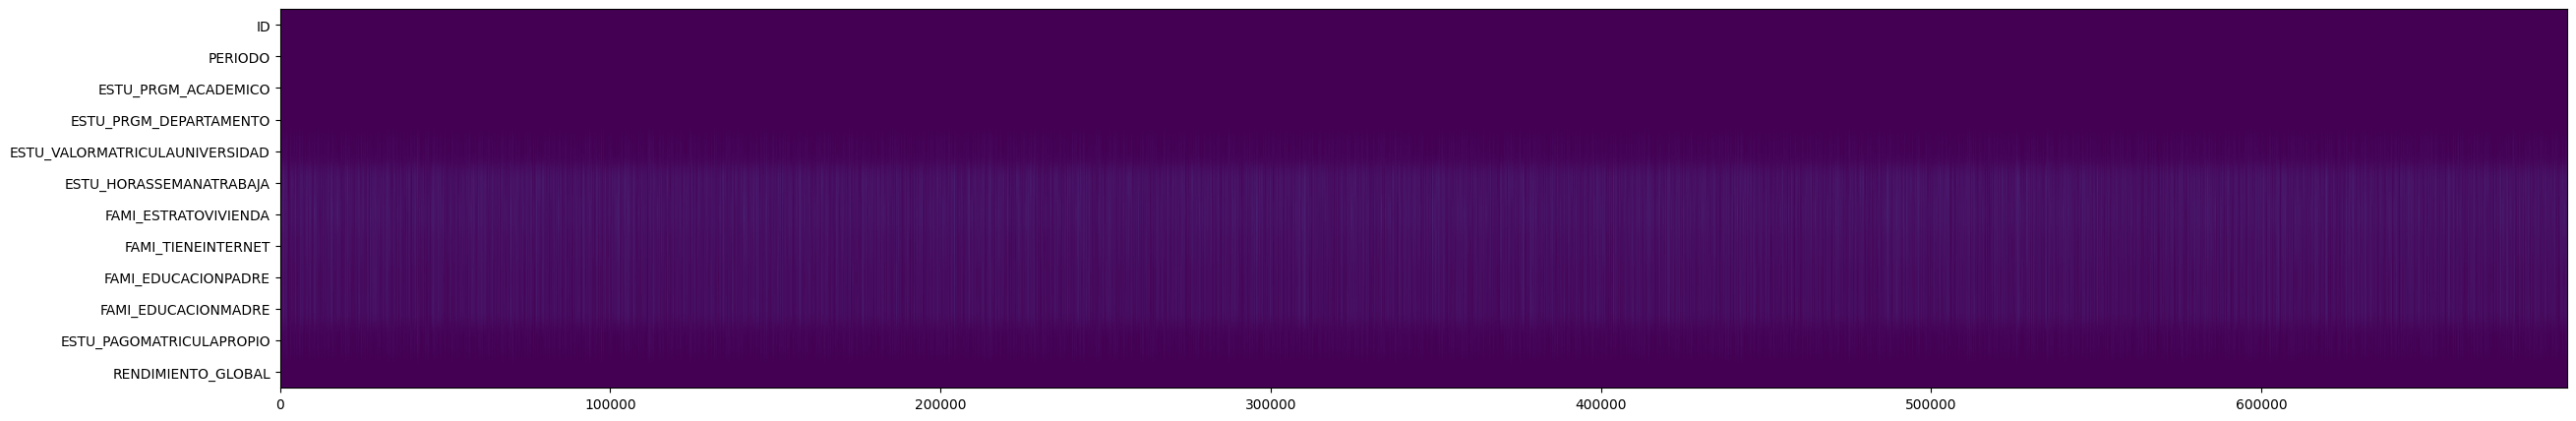

In [5]:
#Gráfica de las columnas con valores nulos
ax = plt.figure(figsize=(30,5)).add_subplot(111)
ax.imshow(df.isna().values.T)
ax.set_aspect('auto')
plt.yticks(range(df.shape[1]), df.columns);

In [6]:
#Visualizar los valores únicos de ESTU_VALORMATRICULAUNIVERSIDAD
df['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [7]:
# Definir la función que convertirá los rangos a valores numérico
def convertir_valor_matricula(valor):
    if pd.isna(valor):
        return np.nan
    elif 'Menos de 500 mil' in valor:
        return 250000  # Asignamos un valor promedio entre 0 y 500 mil
    elif 'Entre 500 mil y menos de 1 millón' in valor:
        return 750000  # Promedio entre 500 mil y 1 millón
    elif 'Entre 1 millón y menos de 2.5 millones' in valor:
        return 1750000  # Promedio entre 1 y 2.5 millones
    elif 'Entre 2.5 millones y menos de 4 millones' in valor:
        return 3250000  # Promedio entre 2.5 y 4 millones
    elif 'Entre 4 millones y menos de 5.5 millones' in valor:
        return 4750000  # Promedio entre 4 y 5.5 millones
    elif 'Entre 5.5 millones y menos de 7 millones' in valor:
        return 6250000  # Promedio entre 5.5 y 7 millones
    elif 'Más de 7 millones' in valor:
        return 7500000  # Asignamos un valor mínimo representativo superior a 7 millones
    elif 'No pagó matrícula' in valor:
        return 0  # Asumimos que no se pagó nada
    else:
        return np.nan  # Para cualquier caso que no coincida

In [8]:
df_copy = df.copy() # Se crea una copia del df
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'] = df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].apply(convertir_valor_matricula) # Se reemplazan los valores de la columna por datos numéricos

#Se decide reeplazar los datos nulos en ESTU_VALORMATRICULAUNIVERSIDAD con la media de esta misma
media = df_copy ['ESTU_VALORMATRICULAUNIVERSIDAD'].mean()
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'] = df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(media.round(3))

#Se verifica que ya no queden valores nulos en la columna ESTU_VALORMATRICULAUNIVERSIDAD
df_copy['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()

array([6250000.   , 3250000.   , 4750000.   , 7500000.   , 1750000.   ,
        750000.   ,  250000.   ,       0.   , 2815800.269])

In [9]:
#Visualizar los valores únicos de ESTU_HORASSEMANATRABAJA
df_copy['ESTU_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [10]:
#Función para convertir los valores en letra de ESTU_HORASSEMANATRABAJA a datos numéricos
def convertir_horas_trabajadas(valor):
    if isinstance(valor, str):
        if "Entre" in valor:
            partes = valor.split('y')
            min_val = float(partes[0].split(' ')[-2])  # Obtener el penúltimo elemento
            max_val = float(partes[1].split(' ')[-2])  # Obtener el penúltimo elemento de la segunda parte
            return (min_val + max_val) / 2  # Retornar el promedio del rango

        elif "Más de" in valor:
            return float(valor.split(' ')[2])  # Convertir a número

        elif "Menos de" in valor:
            return float(valor.split(' ')[2])  # Convertir a número

        elif "0" in valor:
            return 0  # Devolver 0 en número

    return np.nan  # Devolver NaN si no es un valor válido

In [11]:
df_copy['ESTU_HORASSEMANATRABAJA'] = df_copy['ESTU_HORASSEMANATRABAJA'].apply(convertir_horas_trabajadas) # Se reemplazan los valores de la columna por datos numéricos

df_copy['ESTU_HORASSEMANATRABAJA'] = df_copy['ESTU_HORASSEMANATRABAJA'].fillna(0) # Se reemplazan datos nulos por 0

#Se verifica que ya no queden valores nulos en la columna ESTU_HORASSEMANATRABAJA
df_copy['ESTU_HORASSEMANATRABAJA'].unique()

array([10. ,  0. , 30. , 25.5, 15.5])

In [12]:
#Visualizar los valores únicos de FAMI_ESTRATOVIVIENDA
df_copy['FAMI_ESTRATOVIVIENDA'].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [13]:
# Crear un diccionario para asignar el valor numérico a cada valor en letra de la columna FAMI_ESTRATOVIVIENDA
estrato_dict = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0,
    np.nan: 0  # Cambiar datos nulos a 0
}

# Reemplazar los valores en la columna FAMI_ESTRATOVIVIENDA
df_copy['FAMI_ESTRATOVIVIENDA'] = df_copy['FAMI_ESTRATOVIVIENDA'].replace(estrato_dict)

# Se verifica que ya no queden valores nulos en la columna FAMI_ESTRATOVIVIENDA
df_copy['FAMI_ESTRATOVIVIENDA'].unique()

<ipython-input-13-7a2971612dd2>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['FAMI_ESTRATOVIVIENDA'] = df_copy['FAMI_ESTRATOVIVIENDA'].replace(estrato_dict)


array([3., 4., 5., 2., 1., 0., 6.])

In [14]:
# Reemplazar "Si" por 1 y "No" por 0 en la columna FAMI_TIENEINTERNET
df_copy['FAMI_TIENEINTERNET'] = df_copy['FAMI_TIENEINTERNET'].replace({'Si': 1, 'No': 0})

# Se reemplazan los valores nulos por 0
df_copy['FAMI_TIENEINTERNET'] = df_copy['FAMI_TIENEINTERNET'].fillna(0)

# Se verifica que ya no queden valores nulos en la columna FAMI_TIENEINTERNET
df_copy['FAMI_TIENEINTERNET'].unique()

<ipython-input-14-7843fa38d5da>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['FAMI_TIENEINTERNET'] = df_copy['FAMI_TIENEINTERNET'].replace({'Si': 1, 'No': 0})


array([1., 0.])

In [15]:
# Reemplazar "Si" por 1 y "No" por 0 en la columna ESTU_PAGOMATRICULAPROPIO
df_copy['ESTU_PAGOMATRICULAPROPIO'] = df_copy['ESTU_PAGOMATRICULAPROPIO'].replace({'Si': 1, 'No': 0})

# Se reemplazan los valores nulos por 0
df_copy['ESTU_PAGOMATRICULAPROPIO'] = df_copy['ESTU_PAGOMATRICULAPROPIO'].fillna(0)

#Se verifica que ya no queden valores nulos en la columna FAMI_TIENEINTERNET
df_copy['ESTU_PAGOMATRICULAPROPIO'].unique()

<ipython-input-15-add613f659cb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['ESTU_PAGOMATRICULAPROPIO'] = df_copy['ESTU_PAGOMATRICULAPROPIO'].replace({'Si': 1, 'No': 0})


array([0., 1.])

In [16]:
#Visualizar los valores únicos de RENDIMIENTO_GLOBAL
df_copy['RENDIMIENTO_GLOBAL'].unique()

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [17]:
# Crear un diccionario para asignar el valor numérico a cada valor en letra de la columna RENDIMIENTO_GLOBAL de 1 a 4, de más bajo a más alto
rend_dict = {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4,
}

# Reemplazar los valores en la columna RENDIMIENTO_GLOBAL
df_copy['RENDIMIENTO_GLOBAL'] = df_copy['RENDIMIENTO_GLOBAL'].replace(rend_dict)

# Se verifica que ya no queden valores nulos en la columna RENDIMIENTO_GLOBAL
df_copy['RENDIMIENTO_GLOBAL'].unique()

<ipython-input-17-0a918cfde127>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['RENDIMIENTO_GLOBAL'] = df_copy['RENDIMIENTO_GLOBAL'].replace(rend_dict)


array([3, 1, 4, 2])

In [18]:
#Visualizar los valores únicos de FAMI_EDUCACIONMADRE
df_copy['FAMI_EDUCACIONMADRE'].unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

In [19]:
#Visualizar los valores únicos de FAMI_EDUCACIONPADRE
df_copy['FAMI_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [20]:
# Función para convertir columnas a columnas one hot (vista en el NoteBook 04.02)
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(d, col):
    assert sum(d[col].isna())==0, "column must have no NaN values"
    values = np.unique(d[col]
                      )
    k = to_onehot(d[col].values)
    r = pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=d.index).join(d)
    del(r[col])
    return r

In [21]:
# Convertir los valores de FAMI_EDUCACIONMADRE y FAMI_EDUCACIONPADRE en one hot
col_m = 'FAMI_EDUCACIONMADRE'
df_copy[col_m].fillna('No Aplica', inplace=True)
madre_onehot = replace_column_with_onehot(df_copy[[col_m]], col_m)
df_copy = df_copy.join(madre_onehot)
df_copy = df_copy.drop(col_m, axis=1)

col_p = 'FAMI_EDUCACIONPADRE'
df_copy[col_p].fillna('No Aplica', inplace=True)
padre_onehot = replace_column_with_onehot(df_copy[[col_p]], col_p)
df_copy = df_copy.join(padre_onehot)
df_copy = df_copy.drop(col_p, axis=1)

df_copy

<ipython-input-21-0a93748ce821>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col_m].fillna('No Aplica', inplace=True)
<ipython-input-21-0a93748ce821>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta
0,904256,20212,ENFERMERIA,BOGOTÁ,6250000.0,10.0,3.0,1.0,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1,645256,20212,DERECHO,ATLANTICO,3250000.0,0.0,3.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3250000.0,30.0,3.0,1.0,0.0,1,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4750000.0,0.0,4.0,1.0,0.0,4,...,0,0,1,0,0,0,0,0,0,0
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3250000.0,25.5,3.0,1.0,0.0,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,750000.0,15.5,2.0,1.0,1.0,3,...,0,0,0,0,0,0,1,0,0,0
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,3250000.0,30.0,3.0,1.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1750000.0,10.0,3.0,1.0,1.0,2,...,0,0,0,0,0,0,1,0,0,0
692498,986620,20195,PSICOLOGIA,TOLIMA,3250000.0,10.0,1.0,0.0,1.0,1,...,0,0,0,0,1,0,0,0,0,0


In [22]:
# Codificamos los programas con label encoding para que quede en términos numéricos
le = LabelEncoder()

df_copy['ESTU_PRGM_ACADEMICO'] = le.fit_transform(df_copy['ESTU_PRGM_ACADEMICO'])

df_copy['ESTU_PRGM_ACADEMICO'].unique()

array([300, 249, 819,  14, 907, 811, 455,  94, 452,  97, 362, 581, 773,
       194, 154, 888, 800, 456, 943, 570, 384, 233,  48,  80, 304, 568,
       372, 947, 188, 614, 196, 931, 810,  29, 229, 844, 281, 295, 398,
       236, 402, 118, 717,  50,   8, 418, 520, 908, 380,  67, 501, 597,
       692, 733, 638, 376, 835, 366, 745, 812, 277, 917, 567,  95, 324,
       659, 781, 607, 387, 928, 413, 533, 882, 284, 741, 328, 314, 725,
       205, 388, 120, 202, 325, 465,  40, 846, 201, 777, 446, 539, 386,
       760, 934, 408, 869, 308, 373, 753,  21, 865, 839, 217, 941, 317,
       730, 499, 399, 443,  34, 525, 876, 301, 710, 571, 416, 419, 789,
       375, 602, 940, 836,   9, 367,  28,  58, 371, 838, 315, 346, 299,
       705, 738, 944, 355, 391, 591, 536, 851, 557, 437, 868, 657, 302,
       624, 577, 484, 395, 167, 144, 461, 649, 417, 574, 200, 818,  62,
        99,   5, 739, 164, 684, 198, 169, 647, 498, 172, 412, 706, 695,
       433,  30, 296, 136, 159, 190, 813, 620, 297, 890, 467, 65

In [23]:
#Visualizar los valores únicos de ESTU_PRGM_DEPARTAMENTO
df_copy['ESTU_PRGM_DEPARTAMENTO'].unique()

array(['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'SUCRE',
       'CAQUETA', 'CUNDINAMARCA', 'BOLIVAR', 'TOLIMA', 'VALLE', 'QUINDIO',
       'RISARALDA', 'CORDOBA', 'META', 'LA GUAJIRA', 'BOYACA', 'NARIÑO',
       'CAUCA', 'NORTE SANTANDER', 'CESAR', 'PUTUMAYO', 'CALDAS',
       'MAGDALENA', 'CHOCO', 'CASANARE', 'ARAUCA', 'GUAVIARE', 'AMAZONAS',
       'VAUPES', 'SAN ANDRES'], dtype=object)

In [24]:
# Convertir los valores de ESTU_PRGM_DEPARTAMENTO en one hot
col_d = 'ESTU_PRGM_DEPARTAMENTO'
depart_onehot = replace_column_with_onehot(df_copy[[col_d]], col_d)
df_copy = df_copy.join(depart_onehot)
df_copy = df_copy.drop(col_d, axis=1)

df_copy

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,FAMI_EDUCACIONMADRE_Educación profesional completa,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,904256,20212,300,6250000.0,10.0,3.0,1.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,645256,20212,249,3250000.0,0.0,3.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,308367,20203,819,3250000.0,30.0,3.0,1.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,470353,20195,14,4750000.0,0.0,4.0,1.0,0.0,4,0,...,0,0,0,0,0,1,0,0,0,0
4,989032,20212,907,3250000.0,25.5,3.0,1.0,0.0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,144,750000.0,15.5,2.0,1.0,1.0,3,0,...,0,0,0,0,0,0,0,0,0,0
692496,754213,20212,907,3250000.0,30.0,3.0,1.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0
692497,504185,20183,94,1750000.0,10.0,3.0,1.0,1.0,2,0,...,0,0,0,0,0,0,0,0,0,0
692498,986620,20195,907,3250000.0,10.0,1.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,1,0,0
